In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import table
from PIL import Image, ExifTags
import os

In [2]:
df = pd.read_csv("final_data_new_labels.csv", index_col=0)
df

,path,filename,split_filename,original_filename,new_filename,safe_to_walk,roadway_width,crosswalk,crosswalk_signal,traffic_light,car,scooter,bike,other_obstacles,no_obstacle_in_crosswalk,weather,subset
0,V_pic/IMG_7960.jpg,IMG_7960.jpg,IMG_7960,IMG_7960.HEIC,000000.jpg,1,32.1,1,2,2,0,0,1,0,1,0,train
1,V_pic/IMG_7948.jpg,IMG_7948.jpg,IMG_7948,IMG_7948.HEIC,000001.jpg,1,32.6,1,1,0,0,0,0,0,1,0,train
2,V_pic/o013ec39f7e3ed313e7085914aa1cee71_462069...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,000002.jpg,0,8.8,1,2,2,0,0,0,0,1,0,train
3,V_pic/IMG_7747.jpg,IMG_7747.jpg,IMG_7747,IMG_7747.jpeg,000003.jpg,1,7.8,1,1,1,0,0,0,0,1,1,train
4,V_pic/IMG_7753.jpg,IMG_7753.jpg,IMG_7753,IMG_7753.jpeg,000004.jpg,0,12.2,1,2,0,0,0,0,0,1,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,V_pic/o013ec39f7e3ed313e7085914aa1cee71_462069...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,001143.jpg,0,13.2,1,1,2,1,0,0,0,0,0,train
1066,V_pic/IMG_7951.jpg,IMG_7951.jpg,IMG_7951,IMG_7951.HEIC,001144.jpg,0,9.2,1,2,2,0,0,0,0,1,0,train
1067,V_pic/IMG_7945.jpg,IMG_7945.jpg,IMG_7945,IMG_7945.HEIC,001145.jpg,1,8.4,1,1,2,0,0,0,0,1,0,train
1068,V_pic/IMG_7979.jpg,IMG_7979.jpg,IMG_7979,IMG_7979.HEIC,001146.jpg,0,32.1,1,0,0,0,0,0,0,1,0,train


In [3]:
df_train = df.query("subset == 'train'")
df_train

,path,filename,split_filename,original_filename,new_filename,safe_to_walk,roadway_width,crosswalk,crosswalk_signal,traffic_light,car,scooter,bike,other_obstacles,no_obstacle_in_crosswalk,weather,subset
0,V_pic/IMG_7960.jpg,IMG_7960.jpg,IMG_7960,IMG_7960.HEIC,000000.jpg,1,32.1,1,2,2,0,0,1,0,1,0,train
1,V_pic/IMG_7948.jpg,IMG_7948.jpg,IMG_7948,IMG_7948.HEIC,000001.jpg,1,32.6,1,1,0,0,0,0,0,1,0,train
2,V_pic/o013ec39f7e3ed313e7085914aa1cee71_462069...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,000002.jpg,0,8.8,1,2,2,0,0,0,0,1,0,train
3,V_pic/IMG_7747.jpg,IMG_7747.jpg,IMG_7747,IMG_7747.jpeg,000003.jpg,1,7.8,1,1,1,0,0,0,0,1,1,train
4,V_pic/IMG_7753.jpg,IMG_7753.jpg,IMG_7753,IMG_7753.jpeg,000004.jpg,0,12.2,1,2,0,0,0,0,0,1,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,V_pic/o013ec39f7e3ed313e7085914aa1cee71_462069...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,001143.jpg,0,13.2,1,1,2,1,0,0,0,0,0,train
1066,V_pic/IMG_7951.jpg,IMG_7951.jpg,IMG_7951,IMG_7951.HEIC,001144.jpg,0,9.2,1,2,2,0,0,0,0,1,0,train
1067,V_pic/IMG_7945.jpg,IMG_7945.jpg,IMG_7945,IMG_7945.HEIC,001145.jpg,1,8.4,1,1,2,0,0,0,0,1,0,train
1068,V_pic/IMG_7979.jpg,IMG_7979.jpg,IMG_7979,IMG_7979.HEIC,001146.jpg,0,32.1,1,0,0,0,0,0,0,1,0,train


In [4]:
df_val = df.query("subset == 'val'")
df_val

,path,filename,split_filename,original_filename,new_filename,safe_to_walk,roadway_width,crosswalk,crosswalk_signal,traffic_light,car,scooter,bike,other_obstacles,no_obstacle_in_crosswalk,weather,subset
16,V_pic/IMG_3870.jpg,IMG_3870.jpg,IMG_3870,IMG_3870.HEIC,000016.jpg,0,23.3,1,0,0,1,0,0,0,0,1,val
33,V_pic/IMG_3483.jpg,IMG_3483.jpg,IMG_3483,IMG_3483.HEIC,000035.jpg,1,34.5,1,1,1,0,0,0,0,1,0,val
36,V_pic/o013ec39f7e3ed313e7085914aa1cee71_462069...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,000038.jpg,1,5.8,1,2,1,0,0,0,0,1,0,val
64,V_pic/IMG_7977.jpg,IMG_7977.jpg,IMG_7977,IMG_7977.HEIC,000070.jpg,1,8.1,1,1,2,0,0,0,0,1,0,val
79,V_pic/IMG_3873.jpg,IMG_3873.jpg,IMG_3873,IMG_3873.HEIC,000087.jpg,0,22.6,1,1,2,1,0,0,0,0,1,val
89,V_pic/o013ec39f7e3ed313e7085914aa1cee71_462069...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,000097.jpg,0,9.9,1,2,2,0,0,0,0,1,0,val
121,V_pic/IMG_4066.jpg,IMG_4066.jpg,IMG_4066,IMG_4066.HEIC,000132.jpg,1,35.0,1,2,2,0,0,0,0,1,0,val
123,V_pic/IMG_4099.jpg,IMG_4099.jpg,IMG_4099,IMG_4099.HEIC,000134.jpg,0,30.0,1,1,1,0,1,0,0,0,0,val
178,V_pic/IMG_8088.jpg,IMG_8088.jpg,IMG_8088,IMG_8088.HEIC,000193.jpg,0,14.1,1,0,2,0,0,0,0,1,0,val
190,V_pic/IMG_3268.jpg,IMG_3268.jpg,IMG_3268,IMG_3268.HEIC,000205.jpg,0,31.9,1,1,2,1,0,0,0,0,0,val


In [5]:
df_test = df.query("subset == 'test'")
df_test

,path,filename,split_filename,original_filename,new_filename,safe_to_walk,roadway_width,crosswalk,crosswalk_signal,traffic_light,car,scooter,bike,other_obstacles,no_obstacle_in_crosswalk,weather,subset
31,V_pic/IMG_3327.jpg,IMG_3327.jpg,IMG_3327,IMG_3327.HEIC,000033.jpg,0,25.2,1,0,0,1,0,0,0,0,1,test
38,V_pic/IMG_8065.jpg,IMG_8065.jpg,IMG_8065,IMG_8065.HEIC,000041.jpg,0,34.3,1,0,0,1,0,0,0,0,0,test
86,V_pic/IMG_8067.jpg,IMG_8067.jpg,IMG_8067,IMG_8067.HEIC,000094.jpg,1,28.6,1,1,1,0,0,0,0,1,0,test
87,V_pic/IMG_20210610_130812.jpg,IMG_20210610_130812.jpg,IMG_20210610_130812,IMG_20210610_130812.jpg,000095.jpg,0,36.3,1,0,1,0,0,0,0,1,0,test
91,V_pic/o013ec39f7e3ed313e7085914aa1cee71_462069...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,000099.jpg,0,10.4,1,2,2,0,0,0,0,1,0,test
104,V_pic/IMG_20210604_153551.jpg,IMG_20210604_153551.jpg,IMG_20210604_153551,IMG_20210604_153551.jpg,000113.jpg,0,31.2,1,0,0,0,0,0,0,1,1,test
106,V_pic/IMG_20210607_202541.jpg,IMG_20210607_202541.jpg,IMG_20210607_202541,IMG_20210607_202541.jpg,000115.jpg,0,18.5,1,0,2,0,0,0,0,1,2,test
110,V_pic/IMG_8072.jpg,IMG_8072.jpg,IMG_8072,IMG_8072.HEIC,000119.jpg,0,14.2,1,0,2,1,0,0,0,0,0,test
122,V_pic/IMG_20210608_153338.jpg,IMG_20210608_153338.jpg,IMG_20210608_153338,IMG_20210608_153338.jpg,000133.jpg,1,33.4,1,1,0,0,0,0,0,1,0,test
130,V_pic/IMG_7972.jpg,IMG_7972.jpg,IMG_7972,IMG_7972.HEIC,000141.jpg,1,4.9,1,1,2,0,0,0,0,1,0,test


In [6]:
len(df_train.query("traffic_light == 2"))

485

In [7]:
len(df_val.query("no_obstacle_in_crosswalk == 1"))

42

In [8]:
len(df_test.query("no_obstacle_in_crosswalk == 1"))

34

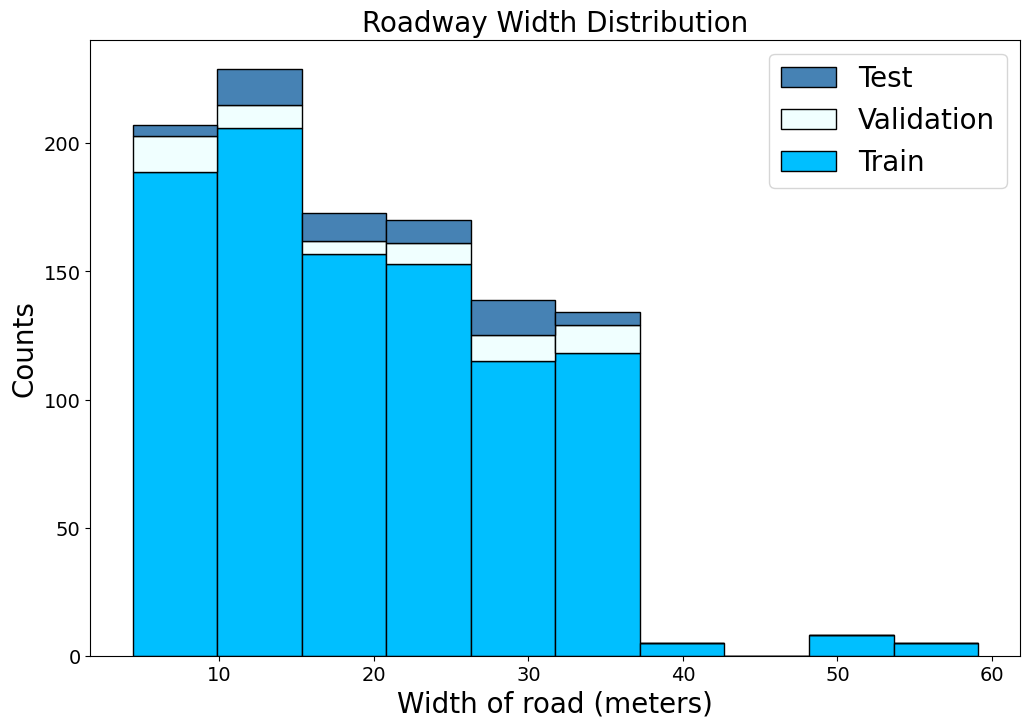

In [9]:
# roadway_width

x1, x2, x3 = df_train["roadway_width"], df_val["roadway_width"], df_test["roadway_width"]
color, label = ['deepskyblue', 'azure', 'steelblue'], ['Train', 'Validation', 'Test']

#Stack the data
fig = plt.figure(figsize=(12,8))
plt.hist([x1,x2,x3], stacked=True, color=color, edgecolor='black', label=label)

plt.xlabel("Width of road (meters)", size=20)
plt.xticks(fontsize=14)
plt.ylabel("Counts", size=20)
plt.yticks(fontsize=14)

plt.title("Roadway Width Distribution", size=20)

handles, labels = plt.gca().get_legend_handles_labels()
order = [2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=20)

plt.savefig("roadway_width_data_stats.png")


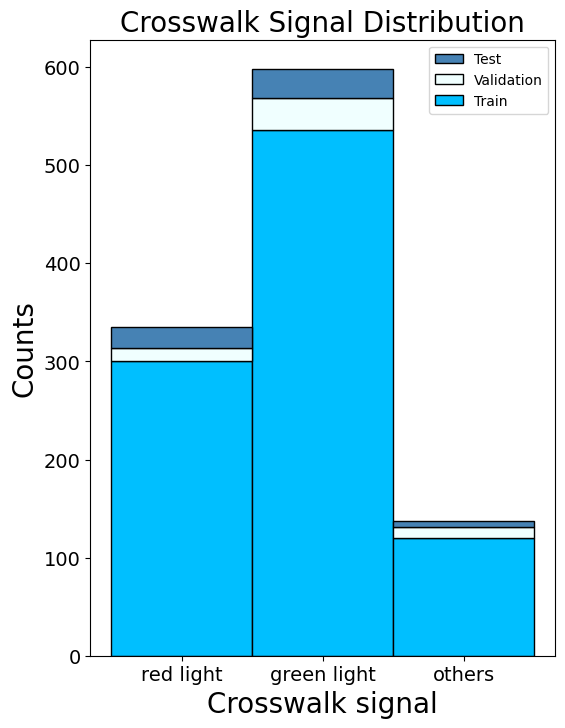

In [10]:
# crosswalk_signal

x1, x2, x3 = df_train["crosswalk_signal"], df_val["crosswalk_signal"], df_test["crosswalk_signal"]
color, label = ['deepskyblue', 'azure', 'steelblue'], ['Train', 'Validation', 'Test']
bins = np.linspace(-0.5, 2.5, 4)

#Stack the data
plt.figure(figsize=(6,8))
plt.hist([x1,x2,x3], bins, stacked=True, color=color, edgecolor='black', label=label)

plt.xlabel("Crosswalk signal", size=20)
plt.xticks([0, 1, 2], ['red light', 'green light', 'others'], fontsize=14)
plt.ylabel("Counts", size=20)
plt.yticks(fontsize=14)

plt.title("Crosswalk Signal Distribution", size=20)
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=10)

plt.savefig("crosswalk_signal_data_stats.png")


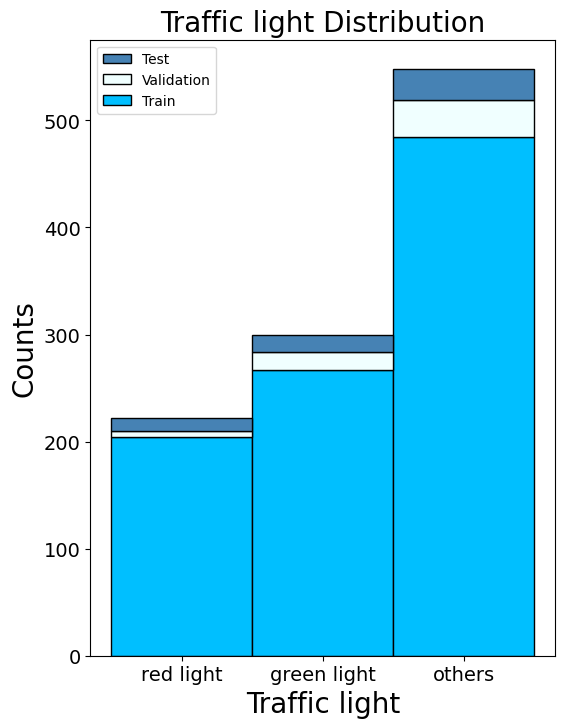

In [11]:
# traffic_light

x1, x2, x3 = df_train["traffic_light"], df_val["traffic_light"], df_test["traffic_light"]
color, label = ['deepskyblue', 'azure', 'steelblue'], ['Train', 'Validation', 'Test']
bins = np.linspace(-0.5, 2.5, 4)

#Stack the data
plt.figure(figsize=(6,8))
plt.hist([x1,x2,x3], bins, stacked=True, color=color, edgecolor='black', label=label)

plt.xlabel("Traffic light", size=20)
plt.xticks([0, 1, 2], ['red light', 'green light', 'others'], fontsize=14)
plt.ylabel("Counts", size=20)
plt.yticks(fontsize=14)

plt.title("Traffic light Distribution", size=20)
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=10)

plt.savefig("traffic_light_data_stats.png")


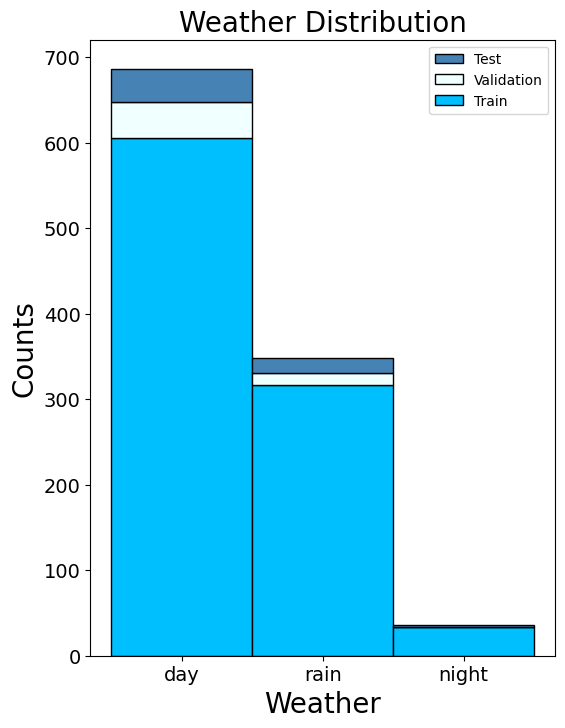

In [12]:
# weather

x1, x2, x3 = df_train["weather"], df_val["weather"], df_test["weather"]
color, label = ['deepskyblue', 'azure', 'steelblue'], ['Train', 'Validation', 'Test']
bins = np.linspace(-0.5, 2.5, 4)

#Stack the data
plt.figure(figsize=(6,8))
plt.hist([x1,x2,x3], bins, stacked=True, color=color, edgecolor='black', label=label)

plt.xlabel("Weather", size=20)
plt.xticks([0, 1, 2], ['day', 'rain', 'night'], fontsize=14)
plt.ylabel("Counts", size=20)
plt.yticks(fontsize=14)

plt.title("Weather Distribution", size=20)
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=10)

plt.savefig("weather_stats.png")
